# Featuring Data EDA

In [1]:
import pandas as pd

from featuringdata.featuresEDA import FeaturesEDA
from featuringdata.featureSelector import FeatureSelector

## Data Input

In [2]:
train_data = pd.read_csv('housing_ames_regression_train.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



## Features EDA

In [5]:
eda = FeaturesEDA(report_prefix='Housing_Ames', target_col="SalePrice", cols_to_drop=["Id"])

In [6]:
# Run this to get an abbreviated PDF report (similar information to dataframe.info() and dataframe.describe()):
# eda.run_initial_eda(train_data)

In [7]:
# Run this to get a full EDA report in PDF format in the local directory:
eda.run_full_eda(train_data, run_collinear=True, generate_plots=True)

--- Null Values Analysis ---
Out of 80 total data columns, there are 19 columns with at least 1 null value.

Out of 1460 total rows/data samples, 1460 rows have at least one null value.
The row with the most NULL values has 16 NULLs.

--- Sorting Numeric and Non-numeric Columns / Unique Values ---
There are 36 numeric columns and 43 non-numeric columns.

--- Target Column ---
For the chosen target column ('SalePrice'), this appears to be a regression problem.
The target column has 0 null values and 663 unique values.

--- Feature Correlations ---
For random forest (RF) correlation measure, using 50 trees and min_samples_leaf=44.

Running correlations of numeric features to target variable...


  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/630 [00:00<?, ?it/s]

For random forest (RF) correlation measure, using 50 trees and min_samples_leaf=4.

Running correlations of non-numeric features to target variable...


  0%|          | 0/43 [00:00<?, ?it/s]

Generating plots of numeric features...


  0%|          | 0/36 [00:00<?, ?it/s]

Generating plots of non-numeric/categorical features...


  0%|          | 0/43 [00:00<?, ?it/s]

For 'Neighborhood', more than 20 unique values: Only plotting top 20, which is 1405 out of 1460 total datapoints.

--- Files Output ---
File 'Housing_Ames_EDA_Report_20240503_164941.pdf' has been saved in current working directory.
All PNG files can be found in ./Housing_Ames_EDA_plots_20240503_164941.


In [8]:
eda.master_columns_df.head()

,Num of Nulls,Frac Null,dtype,Column Type (orig),Num Unique Values,Column Note,Column Type,Count not-Null,Pearson,Mutual Info,Random Forest,COLLIN Avg Pearson Corr,COLLIN Avg RF Corr,COLLIN Max Pear Corr Feature,COLLIN Max Pear,COLLIN Max RF Corr Feature,COLLIN Max RF Corr,RF_norm
MSSubClass,0,0.00,int64,numeric,15,None,numeric,1460,-0.08,0.27,0.24,0.09,0.12,LotFrontage,-0.39,2ndFlrSF,0.48,NaN
MSZoning,0,0.00,object,non-numeric,5,None,non-numeric,1460,NaN,0.13,0.11,NaN,NaN,NaN,NaN,NaN,NaN,0.11
LotFrontage,259,0.18,float64,numeric,110,None,numeric,1201,0.35,0.22,0.23,0.17,0.09,1stFlrSF,0.46,MSSubClass,0.33,NaN
LotArea,0,0.00,int64,numeric,1073,None,numeric,1460,0.26,0.16,0.25,0.11,0.07,LotFrontage,0.43,LotFrontage,0.29,NaN
Street,0,0.00,object,non-numeric,2,None,non-numeric,1460,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00


In [9]:
print(len(eda.numeric_cols), len(eda.non_numeric_cols))

36 43


### Additional Stuff

## Feature Selector

In [10]:
parameter_dict = {'max_depth': [3, 4, 5, 6], 'gamma': [0, 1, 5],
                  'min_child_weight': [0, 1, 5], 'max_delta_step': [0, 1, 5]}

In [11]:
print(eda.target_type)

regression


In [12]:
fselect = FeatureSelector(eda.numeric_cols, eda.non_numeric_cols, report_prefix=eda.report_prefix,
                          target_col=eda.target_col, target_type=eda.target_type, target_log=True,
                          parameter_dict=parameter_dict)  #val_size=0.15)

Starting number of feature columns: 287

Running grid search at Iteration 0 on data split 1...


  0%|          | 0/108 [00:00<?, ?it/s]

Running grid search at Iteration 0 on data split 2...


  0%|          | 0/108 [00:00<?, ?it/s]


Iter 0 -- New best params: {'gamma': 0, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 0}

Iter 0 287 0.14385 OverallQual 0.19
Iter 1 120 0.14385 OverallQual 0.19
Iter 2 119 0.14385 OverallQual 0.19
Iter 3 118 0.14385 OverallQual 0.19
Iter 4 117 0.14385 OverallQual 0.19
Iter 5 116 0.14201 OverallQual 0.19
Iter 6 109 0.14201 OverallQual 0.19
Iter 7 108 0.14201 OverallQual 0.19
Iter 8 107 0.14201 OverallQual 0.19
Iter 9 106 0.14201 OverallQual 0.19
Iter 10 105 0.14201 OverallQual 0.19
Iter 11 104 0.14201 OverallQual 0.19
Iter 12 103 0.14198 OverallQual 0.18
Iter 13 102 0.14201 OverallQual 0.2
Iter 14 101 0.14214 OverallQual 0.19
Running grid search at Iteration 15 on data split 1...


  0%|          | 0/108 [00:00<?, ?it/s]

Running grid search at Iteration 15 on data split 2...


  0%|          | 0/108 [00:00<?, ?it/s]


Iter 15 -- New best params: {'gamma': 0, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 0}

Iter 15 98 0.14214 OverallQual 0.19
Iter 16 97 0.14214 OverallQual 0.19
Iter 17 96 0.14214 OverallQual 0.19
Iter 18 95 0.14216 OverallQual 0.19
Iter 19 94 0.14216 OverallQual 0.19
Iter 20 93 0.1396 OverallQual 0.19
Iter 21 92 0.1396 OverallQual 0.2
Iter 22 90 0.1396 OverallQual 0.2
Iter 23 89 0.14088 OverallQual 0.21
Iter 24 88 0.14158 OverallQual 0.19
Iter 25 87 0.14158 OverallQual 0.19
Iter 26 86 0.14076 OverallQual 0.21
Iter 27 85 0.14023 OverallQual 0.2
Iter 28 84 0.14158 OverallQual 0.2
Iter 29 83 0.14022 OverallQual 0.21
Running grid search at Iteration 30 on data split 1...


  0%|          | 0/108 [00:00<?, ?it/s]

Running grid search at Iteration 30 on data split 2...


  0%|          | 0/108 [00:00<?, ?it/s]


Iter 30 -- New best params: {'gamma': 0, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 0}

Iter 30 82 0.14022 OverallQual 0.21
Iter 31 81 0.14022 OverallQual 0.2
Iter 32 80 0.14022 OverallQual 0.2
Iter 33 79 0.13953 OverallQual 0.2
Iter 34 78 0.13998 BsmtQual_Ex 0.21
Iter 35 77 0.1432 OverallQual 0.2
Iter 36 76 0.14175 BsmtQual_Ex 0.22
Iter 37 75 0.14175 BsmtQual_Ex 0.22
Iter 38 74 0.14185 BsmtQual_Ex 0.21
Iter 39 73 0.1462 OverallQual 0.28
Iter 40 68 0.1462 OverallQual 0.28
Iter 41 67 0.1462 OverallQual 0.3
Iter 42 66 0.1462 OverallQual 0.28
Iter 43 65 0.14133 OverallQual 0.23
Iter 44 64 0.14133 OverallQual 0.23
Running grid search at Iteration 45 on data split 1...


  0%|          | 0/108 [00:00<?, ?it/s]

Running grid search at Iteration 45 on data split 2...


  0%|          | 0/108 [00:00<?, ?it/s]


Iter 45 -- New best params: {'gamma': 0, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 0}

Iter 45 63 0.14467 OverallQual 0.22
Iter 46 62 0.14467 OverallQual 0.22
Iter 47 61 0.1462 OverallQual 0.23
Iter 48 60 0.14369 OverallQual 0.21
Iter 49 59 0.14541 OverallQual 0.22
Iter 50 58 0.14541 OverallQual 0.22
Iter 51 57 0.14541 OverallQual 0.23
Iter 52 56 0.14578 OverallQual 0.23
Iter 53 55 0.14504 OverallQual 0.2
Iter 54 54 0.14643 OverallQual 0.23
Iter 55 53 0.14381 OverallQual 0.24
Iter 56 52 0.13843 OverallQual 0.2
Iter 57 51 0.14091 OverallQual 0.26
Iter 58 50 0.14286 OverallQual 0.25
Iter 59 49 0.14437 OverallQual 0.25
Running grid search at Iteration 60 on data split 1...


  0%|          | 0/108 [00:00<?, ?it/s]

Running grid search at Iteration 60 on data split 2...


  0%|          | 0/108 [00:00<?, ?it/s]


Iter 60 -- New best params: {'gamma': 0, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 0}

Iter 60 48 0.14428 OverallQual 0.23
Iter 61 47 0.14831 OverallQual 0.22
Iter 62 46 0.14831 OverallQual 0.22
Iter 63 45 0.14411 OverallQual 0.22
Iter 64 44 0.14269 OverallQual 0.23
Iter 65 43 0.14915 OverallQual 0.22
Iter 66 42 0.14863 OverallQual 0.22
Iter 67 41 0.14389 OverallQual 0.25
Iter 68 40 0.14257 OverallQual 0.21
Iter 69 39 0.148 OverallQual 0.22
Iter 70 38 0.14659 OverallQual 0.22
Iter 71 37 0.1443 OverallQual 0.24
Iter 72 36 0.14843 OverallQual 0.21
Iter 73 35 0.14291 OverallQual 0.22
Iter 74 34 0.14171 OverallQual 0.25
Running grid search at Iteration 75 on data split 1...


  0%|          | 0/108 [00:00<?, ?it/s]

Running grid search at Iteration 75 on data split 2...


  0%|          | 0/108 [00:00<?, ?it/s]


Iter 75 -- New best params: {'gamma': 0, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 5}

Iter 75 33 0.14221 OverallQual 0.26
Iter 76 32 0.1399 OverallQual 0.3
Iter 77 31 0.13967 OverallQual 0.32
Iter 78 30 0.14276 OverallQual 0.28
Iter 79 29 0.14276 OverallQual 0.28
Iter 80 28 0.14299 OverallQual 0.28
Iter 81 27 0.14313 OverallQual 0.26
Iter 82 26 0.14005 OverallQual 0.34
Iter 83 25 0.14284 OverallQual 0.29
Iter 84 24 0.14426 OverallQual 0.3
Iter 85 23 0.1444 OverallQual 0.3
Iter 86 22 0.14374 OverallQual 0.31
Iter 87 21 0.14473 OverallQual 0.33
Iter 88 20 0.14405 OverallQual 0.34
Iter 89 19 0.14293 OverallQual 0.35
Running grid search at Iteration 90 on data split 1...


  0%|          | 0/108 [00:00<?, ?it/s]

Running grid search at Iteration 90 on data split 2...


  0%|          | 0/108 [00:00<?, ?it/s]


Iter 90 -- New best params: {'gamma': 0, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 0}

Iter 90 18 0.14129 OverallQual 0.31
Iter 91 17 0.14096 OverallQual 0.3
Iter 92 16 0.14218 OverallQual 0.34
Iter 93 15 0.15036 OverallQual 0.33
Iter 94 14 0.15011 OverallQual 0.36
Iter 95 13 0.15341 BsmtQual_Ex 0.45
Iter 96 12 0.15372 BsmtQual_Ex 0.36
Iter 97 11 0.15891 BsmtQual_Ex 0.36
Iter 98 10 0.15837 OverallQual 0.37
Iter 99 9 0.16745 OverallQual 0.33
Iter 100 8 0.16795 OverallQual 0.36
Iter 101 7 0.19251 OverallQual 0.37
Iter 102 6 0.19329 OverallQual 0.39
Iter 103 5 0.20169 OverallQual 0.54
Iter 104 4 0.20697 OverallQual 0.55
Running grid search at Iteration 105 on data split 1...


  0%|          | 0/108 [00:00<?, ?it/s]

Running grid search at Iteration 105 on data split 2...


  0%|          | 0/108 [00:00<?, ?it/s]


Iter 105 -- New best params: {'gamma': 0, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 0}

Iter 105 3 0.2202 OverallQual 0.58
Iter 106 2 0.229 OverallQual 0.93
Iter 107 1 0.22773 OverallQual 1.0

Best results: (1) 0.13843 [56], (2) 0.11197 [61]

Using Iter 61 from data split 2 with {'max_depth': 3, 'gamma': 0, 'min_child_weight': 0, 'max_delta_step': 0}
[0]	validation_0-rmse:0.31636
[1]	validation_0-rmse:0.26217
[2]	validation_0-rmse:0.22105
[3]	validation_0-rmse:0.19293
[4]	validation_0-rmse:0.17648
[5]	validation_0-rmse:0.16351
[6]	validation_0-rmse:0.15311
[7]	validation_0-rmse:0.14837
[8]	validation_0-rmse:0.14378
[9]	validation_0-rmse:0.13874
[10]	validation_0-rmse:0.13612
[11]	validation_0-rmse:0.13419
[12]	validation_0-rmse:0.13305
[13]	validation_0-rmse:0.13046
[14]	validation_0-rmse:0.12927
[15]	validation_0-rmse:0.12940
[16]	validation_0-rmse:0.12596
[17]	validation_0-rmse:0.12525
[18]	validation_0-rmse:0.12447
[19]	validation_0-rmse:0.12304
[20]	validation_0-rms

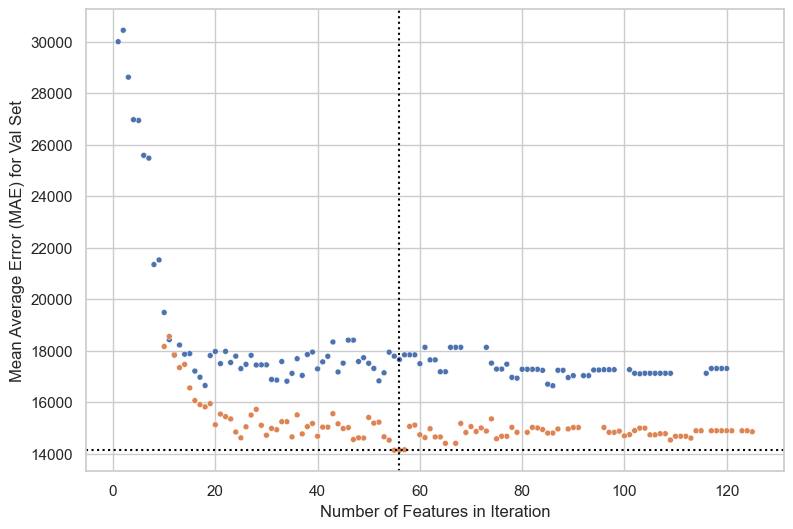

In [13]:
# training_results_df = fselect.run(train_data)
# Optional: Include the 'master_columns_df' from FeaturesEDA to get a comparison plot with the feature importances:
training_results_df = fselect.run(train_data, master_columns_df=eda.master_columns_df)

### Additional Stuff